In [9]:
import pandas as pd
df=pd.DataFrame({
    "EID":[101,102,103,104],
    "Name":['Ram','shyam','Hari','Sita'],
    "Level":['Junior','senior','Junior','mid']
})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EID     4 non-null      int64 
 1   Name    4 non-null      object
 2   Level   4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


In [10]:
#Convert it to category data type
df['Level']=df['Level'].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   EID     4 non-null      int64   
 1   Name    4 non-null      object  
 2   Level   4 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 328.0+ bytes
None


In [11]:
df['Level']=df['Level'].cat.rename_categories({
    "Junior":'Jr',
    "senior":'Sr'
})
print(df.head())

   EID   Name Level
0  101    Ram    Jr
1  102  shyam    Sr
2  103   Hari    Jr
3  104   Sita   mid


In [12]:
df['Level_Code']=df['Level'].cat.codes
print(df.head())

   EID   Name Level  Level_Code
0  101    Ram    Jr           0
1  102  shyam    Sr           2
2  103   Hari    Jr           0
3  104   Sita   mid           1


In [13]:
encoded=pd.get_dummies(df['Level'],prefix="Lev",dtype=int)
print(encoded)

   Lev_Jr  Lev_mid  Lev_Sr
0       1        0       0
1       0        0       1
2       1        0       0
3       0        1       0


In [14]:
df_final=pd.concat([df,encoded],axis=1)
print(df_final)

   EID   Name Level  Level_Code  Lev_Jr  Lev_mid  Lev_Sr
0  101    Ram    Jr           0       1        0       0
1  102  shyam    Sr           2       0        0       1
2  103   Hari    Jr           0       1        0       0
3  104   Sita   mid           1       0        1       0


In [16]:
import pandas as pd
df=pd.DataFrame({
    'Date':['2024-01-01','2024-02-01','2024-03-01','2024-04-01'],
    'Sales':[120,135,125,140]
})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4 non-null      object
 1   Sales   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes
None


In [17]:
df.head()

,Date,Sales
0,2024-01-01,120
1,2024-02-01,135
2,2024-03-01,125
3,2024-04-01,140


In [18]:
df['Date']=pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4 non-null      datetime64[ns]
 1   Sales   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes
None


In [19]:
df.head()

,Date,Sales
0,2024-01-01,120
1,2024-02-01,135
2,2024-03-01,125
3,2024-04-01,140


In [20]:
df=df.set_index("Date")
print(df.head())

            Sales
Date             
2024-01-01    120
2024-02-01    135
2024-03-01    125
2024-04-01    140


In [24]:
df["Year"]=df.index.year
df["Month"]=df.index.month
df["Day"]=df.index.day_name()
print(df.head())


            Sales  year  Year  Month       Day
Date                                          
2024-01-01    120  2024  2024      1    Monday
2024-02-01    135  2024  2024      2  Thursday
2024-03-01    125  2024  2024      3    Friday
2024-04-01    140  2024  2024      4    Monday


In [31]:
# df.plot.bar(X='Day',Y='Sales')

In [32]:
df.to_csv('dates.csv')

In [33]:
new_df=pd.read_csv(
    "dates.csv",
    parse_dates=['Date'],
    index_col="Date"
)
new_df.head()

,Sales,year,Year,Month,Day
Date,,,,,
2024-01-01,120,2024,2024,1,Monday
2024-02-01,135,2024,2024,2,Thursday
2024-03-01,125,2024,2024,3,Friday
2024-04-01,140,2024,2024,4,Monday


#Log transformation

0    0.693147
1    2.397895
2    4.615121
3    6.908755
dtype: float64


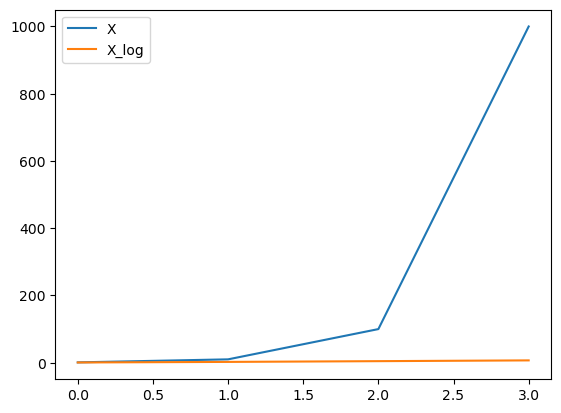

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=pd.Series([1,10,100,1000])
x_log=np.log1p(x)
print(x_log)
plt.plot(x,label="X")
plt.plot(x_log,label="X_log")
plt.legend()
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
X=[[10],[200],[700],[900],[1000]]
scaler=MinMaxScaler()
X_transformed=scaler.fit_transform(X)
print(X_transformed)

[[0.        ]
 [0.19191919]
 [0.6969697 ]
 [0.8989899 ]
 [1.        ]]


In [44]:
from sklearn.preprocessing import StandardScaler
X=[[10],[200],[700],[900],[1000]]
scaler=StandardScaler()
X_transformed=scaler.fit_transform(X)
print(X_transformed)

[[-1.41503113]
 [-0.92797332]
 [ 0.35375778]
 [ 0.86645022]
 [ 1.12279644]]
